In [1]:
import warnings 
warnings.filterwarnings('ignore')

# 1. Use a Python notebook & Load the dataset

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

DF_PD = pd.read_csv('parkinsons.data')
DF_PD.head(10)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

In [37]:
DF_PD.shape

(195, 24)

In [38]:
DF_PD.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [39]:
DF_PD.isna().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

# 3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [40]:
DF_PD.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [41]:
DF_PD.std()

MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        91.491548
MDVP:Flo(Hz)        43.521413
MDVP:Jitter(%)       0.004848
MDVP:Jitter(Abs)     0.000035
MDVP:RAP             0.002968
MDVP:PPQ             0.002759
Jitter:DDP           0.008903
MDVP:Shimmer         0.018857
MDVP:Shimmer(dB)     0.194877
Shimmer:APQ3         0.010153
Shimmer:APQ5         0.012024
MDVP:APQ             0.016947
Shimmer:DDA          0.030459
NHR                  0.040418
HNR                  4.425764
status               0.431878
RPDE                 0.103942
DFA                  0.055336
spread1              1.090208
spread2              0.083406
D2                   0.382799
PPE                  0.090119
dtype: float64

In [42]:
DF_PD_N = DF_PD.drop("status",axis=1) 
DF_PD_N['status']=DF_PD['status']
DF_PD_N.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


Based on the observation of the varience and corr , there are outliers on the column MDVP:Fo(Hz) , 
MDVP:Fhi(Hz), MDVP:Flo(Hz) which required treatment of the data , we have decided to replace the value with the mdedian values . And also the name column can be droped for the modeling as it does have any influence on the target variable .

In [43]:
DF_PD_N=DF_PD_N.drop('name',axis=1)

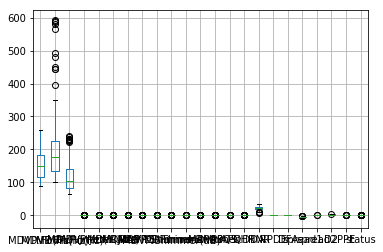

In [44]:
DF_PD_N.boxplot()

In [45]:
DF_PD_N[DF_PD_N.columns.tolist()]=np.where(DF_PD_N[DF_PD_N.columns.tolist()].quantile(.75)*1.5<DF_PD_N[DF_PD_N.columns.tolist()],DF_PD_N[DF_PD_N.columns.tolist()].median(),DF_PD_N[DF_PD_N.columns.tolist()])
DF_PD_N.std()

MDVP:Fo(Hz)         41.390065
MDVP:Fhi(Hz)        45.037627
MDVP:Flo(Hz)        33.603264
MDVP:Jitter(%)       0.002060
MDVP:Jitter(Abs)     0.000019
MDVP:RAP             0.001097
MDVP:PPQ             0.001087
Jitter:DDP           0.003290
MDVP:Shimmer         0.011247
MDVP:Shimmer(dB)     0.103180
Shimmer:APQ3         0.005963
Shimmer:APQ5         0.005968
MDVP:APQ             0.008775
Shimmer:DDA          0.017890
NHR                  0.008010
HNR                  4.425764
RPDE                 0.103942
DFA                  0.055336
spread1              0.293108
spread2              0.080440
D2                   0.382799
PPE                  0.076632
status               0.431878
dtype: float64

[Text(0, 0, 'MDVP:Fo(Hz)'),
 Text(0, 0, 'MDVP:Fhi(Hz)'),
 Text(0, 0, 'MDVP:Flo(Hz)'),
 Text(0, 0, 'MDVP:Jitter(%)'),
 Text(0, 0, 'MDVP:Jitter(Abs)'),
 Text(0, 0, 'MDVP:RAP'),
 Text(0, 0, 'MDVP:PPQ'),
 Text(0, 0, 'Jitter:DDP'),
 Text(0, 0, 'MDVP:Shimmer'),
 Text(0, 0, 'MDVP:Shimmer(dB)'),
 Text(0, 0, 'Shimmer:APQ3'),
 Text(0, 0, 'Shimmer:APQ5'),
 Text(0, 0, 'MDVP:APQ'),
 Text(0, 0, 'Shimmer:DDA'),
 Text(0, 0, 'NHR'),
 Text(0, 0, 'HNR'),
 Text(0, 0, 'RPDE'),
 Text(0, 0, 'DFA'),
 Text(0, 0, 'spread1'),
 Text(0, 0, 'spread2'),
 Text(0, 0, 'D2'),
 Text(0, 0, 'PPE'),
 Text(0, 0, 'status')]

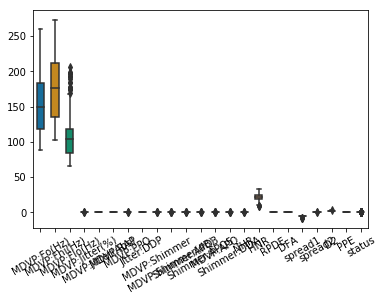

In [47]:
import seaborn as sns 
bplot=sns.boxplot(data=DF_PD_N,
                 width=0.5,
                 palette="colorblind")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)

[Text(0, 0, 'MDVP:Fhi(Hz)')]

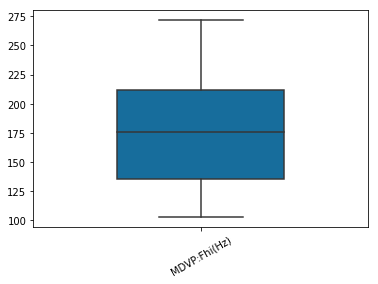

In [48]:
bplot=sns.boxplot(data=DF_PD_N[['MDVP:Fhi(Hz)']],
                 width=0.5,
                 palette="colorblind")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)

Based on teh std value there are many outliers , hence the values are replaced with median value . Anaother way can be delete the data howevere we have decided to keep that records for other columns .

# 4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [50]:
#DF_PD_N=DF_PD_N.drop("name",axis=1)
X = DF_PD_N.drop("status", axis=1)
y = DF_PD_N["status"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [51]:
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [53]:
y_predict = model.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_predict)
print("Accuracy: ", accuracy)
metrics.confusion_matrix(y_predict, y_test)

Accuracy:  0.864406779661017


array([[11,  7],
       [ 1, 40]], dtype=int64)

# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [67]:
DT=DecisionTreeClassifier(max_depth=25,min_samples_leaf=7)
#DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_predict = DT.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.9152542372881356


Based on the observation by changing the max_depth and min_sample_leaf value the accuracy is changing , we need to find the optimal accuracy by using the cross validation and checking which values are giving optimal accuracy value 

# 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [69]:
RF=RandomForestClassifier(n_estimators=10,max_depth=20,min_samples_leaf=7)
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_predict)
print("Accuracy: ", accuracy)

Accuracy:  0.9152542372881356
